In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.metrics import classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [2]:
df = pd.read_csv('Android_Malware.csv', low_memory=False)
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,1,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.014638,3.702700e+04,0.000000e+00,37027.0,37027.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,32,32,27.007319,27.007319,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,1.0,0.000000,0.000,0.000000,32.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2994.0,362.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,1,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.565793,3.665300e+04,0.000000e+00,36653.0,36653.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,32,32,27.282896,27.282896,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,1.0,0.000000,0.000,0.000000,32.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2860.0,362.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,12,1011.0,11924.0,581.0,0.0,126.375,207.799311,1460.0,0.0,993.666667,656.474376,24218.356522,37.446241,2.811047e+04,4.314810e+04,158676.0,8.0,481340.0,6.876286e+04,6.237618e+04,158676.0,449.0,487990.0,44362.727273,86342.042540,217790.0,8.0,0.0,0.0,0,0,180,244,14.978496,22.467745,0.0,1460.0,615.952381,672.744786,452585.547619,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,1.0,646.750000,126.375,993.666667,180.0,0,0.0,0.0,0.0,0.0,0.0,8.0,1011.0,12.0,11924.0,65535.0,63441.0,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,322.268772,4.654500e+03,5.137131e+03,8287.0,1022.0,9309.0,4.654500e+03,5.137131e+03,8287.0,1022.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,60,0,322.268772,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.000000,0.000,0.000000,60.0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,65535.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,6,430.0,5679.0,218.0,0.0,53.750,99.538578,1460.0,0.0,946.500000,710.412204,307.131607,0.703854,1.530038e+06,5.377887e+06,19426714.0,7.0,19890496.0,2.841499e+06,7.314093e+06,19426714.0,639.0,410964.0,82192.800000,154845.683018,355945.0,7

In [3]:
df.shape

(355630, 86)

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(355626, 86)

In [6]:
df['Label'].value_counts()

Android_Adware         147443
Android_Scareware      117081
Android_SMS_Malware     67394
Benign                  23708
Name: Label, dtype: int64

In [7]:
print(df[' Down/Up Ratio'].unique().tolist())


['1.0', '0.0', '2.0', '3.0', '8.0', '4.0', '5.0', '9.0', '6.0', '12.0', '7.0', '10.0', '11.0', '0', '1', '2', '3', '6', '4', '5', '11', '7', '9', '12', '8', '75.0']


In [8]:
# df[' Down/Up Ratio'] = pd.to_numeric(df[' Down/Up Ratio'], errors='coerce')
# df = df.dropna(subset=[' Down/Up Ratio'])

In [9]:
# df[' Down/Up Ratio']=df[' Down/Up Ratio'].apply(lambda x:int(x))
# print(df[' Down/Up Ratio'].unique().tolist())

In [10]:
print(df['Fwd Avg Bytes/Bulk'].unique().tolist())

['0', '0.0']


In [11]:
# Columns only had 1 unique value of 0 or 0.0
# Dropped timestamp because time of connection not used for classification/Flow ID for High cardinality 
df = df.drop(columns=['Unnamed: 0',' CWE Flag Count','Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',' Fwd Avg Bulk Rate',
                      ' Bwd Avg Bytes/Bulk',' Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate',' ECE Flag Count',
                      ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' RST Flag Count',
                      ' Timestamp', 'Flow ID'])


In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(351480, 71)

In [14]:
def labelencoder(df):
    for c in df.columns:
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

In [15]:
df=labelencoder(df)

In [16]:
df.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,9,50004,1283,443.0,6.0,37027,1,1,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.014638,3.702700e+04,0.000000e+00,37027.0,37027.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,32,32,27.007319,27.007319,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,3,0.000000,0.000,0.000000,32.0,1.0,0.0,1.0,0.0,2994.0,362.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,35455,1283,443.0,6.0,36653,1,1,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.565793,3.665300e+04,0.000000e+00,36653.0,36653.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,32,32,27.282896,27.282896,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,3,0.000000,0.000,0.000000,32.0,1.0,0.0,1.0,0.0,2860.0,362.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,9,51775,648,443.0,6.0,534099,8,12,1011.0,11924.0,581.0,0.0,126.375,207.799311,1460.0,0.0,993.666667,656.474376,24218.356522,37.446241,2.811047e+04,4.314810e+04,158676.0,8.0,481340.0,6.876286e+04,6.237618e+04,158676.0,449.0,487990.0,44362.727273,86342.042540,217790.0,8.0,0.0,180,244,14.978496,22.467745,0.0,1460.0,615.952381,672.744786,452585.547619,0.0,0.0,1.0,0.0,0.0,3,646.750000,126.375,993.666667,180.0,8.0,1011.0,12.0,11924.0,65535.0,63441.0,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,9,51775,648,443.0,6.0,9309,3,0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,322.268772,4.654500e+03,5.137131e+03,8287.0,1022.0,9309.0,4.654500e+03,5.137131e+03,8287.0,1022.0,0.0,0.000000,0.000000,0.0,0.0,0.0,60,0,322.268772,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1,0.000000,0.000,0.000000,60.0,3.0,0.0,0.0,0.0,65535.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,9,51776,648,443.0,6.0,19890496,8,6,430.0,5679.0,218.0,0.0,53.750,99.538578,1460.0,0.0,946.500000,710.412204,307.131607,0.703854,1.530038e+06,5.377887e+06,19426714.0,7.0,19890496.0,2.841499e+06,7.314093e+06,19426714.0,639.0,410964.0,82192.800000,154845.683018,355945.0,7.0,0.0,180,124,0.402202,0.301652,0.0,1460.0,407.266667,626.958471,393076.923810,0.0,0.0,1.0,0.0,0.0,1,436.357143,53.750,946.500000,180.0,8.0,430.0,6.0,5679.0,65535.0,64022.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
df['Label'].value_counts()

0    147427
2    117054
1     63291
3     23708
Name: Label, dtype: int64

In [18]:
x=df.drop('Label',axis=1)
y=df['Label']

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)

In [19]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# Reshape input to be [samples, time steps, features]
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

In [21]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,4)
y_test = to_categorical(y_test,4)

In [22]:
x_train.shape

(281184, 1, 70)

In [23]:
# the GRU model
model = Sequential()
model.add(GRU(100, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(100, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [24]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100)               51600     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
Total params: 62,104
Trainable params: 62,104
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Fit the model to the training data
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/30
2197/2197 [==============================] - 16s 6ms/step - loss: 1.1649 - accuracy: 0.4487 - val_loss: 1.0951 - val_accuracy: 0.4852
Epoch 2/30
2197/2197 [==============================] - 13s 6ms/step - loss: 1.0791 - accuracy: 0.4881 - val_loss: 1.0574 - val_accuracy: 0.5011
Epoch 3/30
2197/2197 [==============================] - 13s 6ms/step - loss: 1.0334 - accuracy: 0.5133 - val_loss: 1.0139 - val_accuracy: 0.5183
Epoch 4/30
2197/2197 [==============================] - 13s 6ms/step - loss: 1.0120 - accuracy: 0.5200 - val_loss: 1.0083 - val_accuracy: 0.5188
Epoch 5/30
2197/2197 [==============================] - 13s 6ms/step - loss: 1.0050 - accuracy: 0.5214 - val_loss: 0.9996 - val_accuracy: 0.5257
Epoch 6/30
2197/2197 [==============================] - 14s 6ms/step - loss: 0.9997 - accuracy: 0.5234 - val_loss: 0.9973 - val_accuracy: 0.5244
Epoch 7/30
2197/2197 [==============================] - 14s 6ms/step - loss: 0.9960 - accuracy: 0.5249 - val_loss: 0.9978 - val_ac

In [27]:
# Model Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model Loss: {loss}\nModel Accuracy: {accuracy*100}")

2197/2197 [==============================] - 6s 3ms/step - loss: 0.9642 - accuracy: 0.5407
Model Loss: 0.9641538262367249
Model Accuracy: 54.072779417037964


Text(0, 0.5, 'Loss')

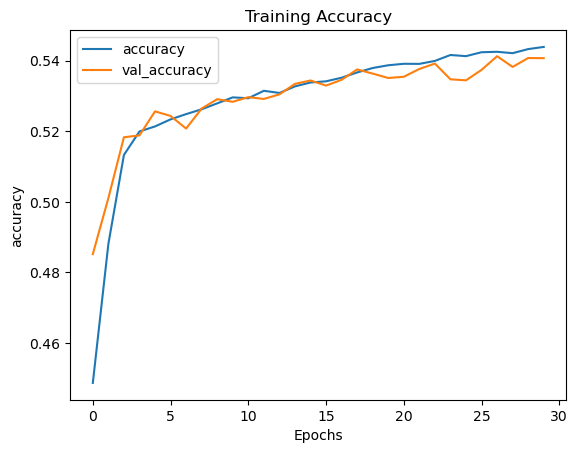

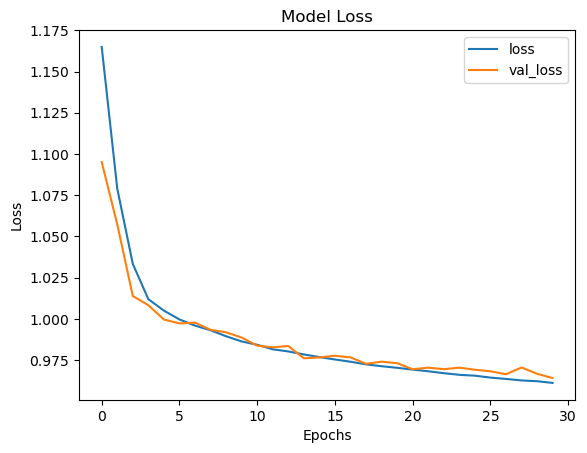

In [28]:
pd.DataFrame(history.history)

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [29]:
y_predict=model.predict(x_test)

y_pred_classes = y_predict.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)

# classification report
report = classification_report(y_test_classes, y_pred_classes)
print(report)

2197/2197 [==============================] - 6s 2ms/step
              precision    recall  f1-score   support

           0       0.51      0.74      0.61     29526
           1       0.93      0.58      0.72     12585
           2       0.44      0.38      0.41     23391
           3       0.31      0.00      0.00      4794

    accuracy                           0.54     70296
   macro avg       0.55      0.43      0.43     70296
weighted avg       0.55      0.54      0.52     70296



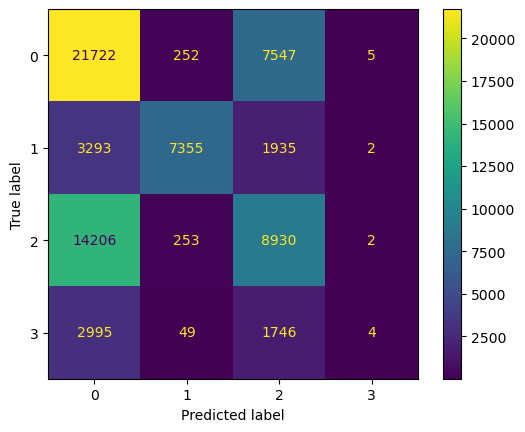

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# compute the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm)

# plot the confusion matrix
cm_display.plot()
plt.show()

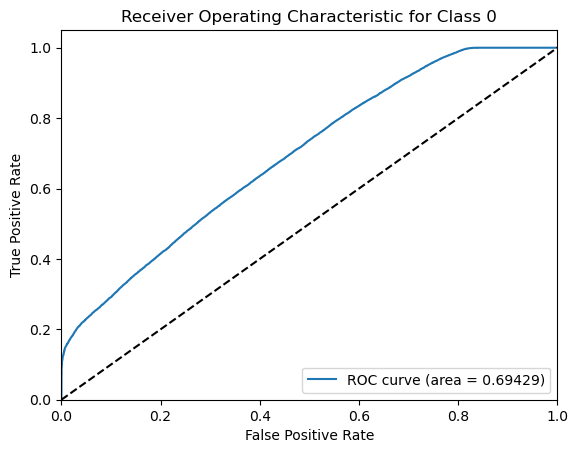

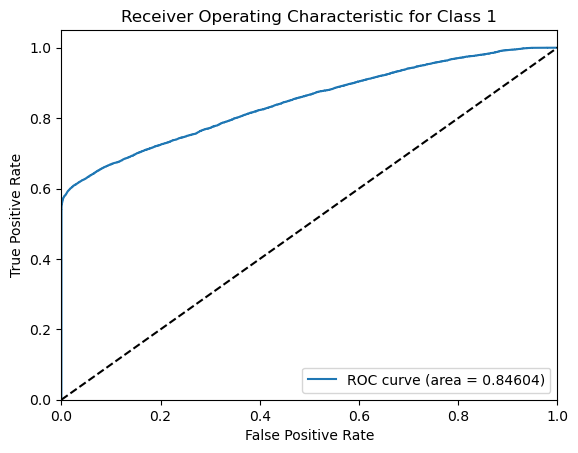

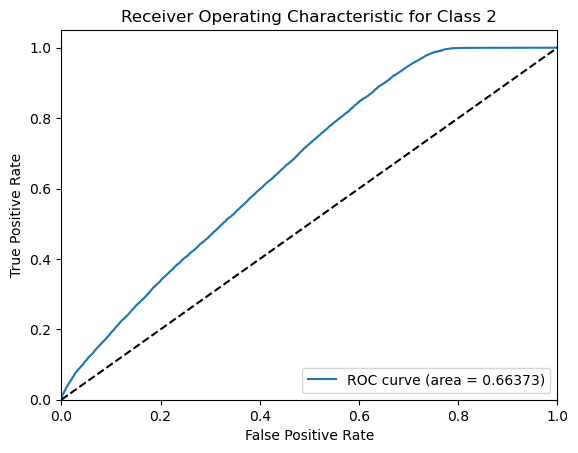

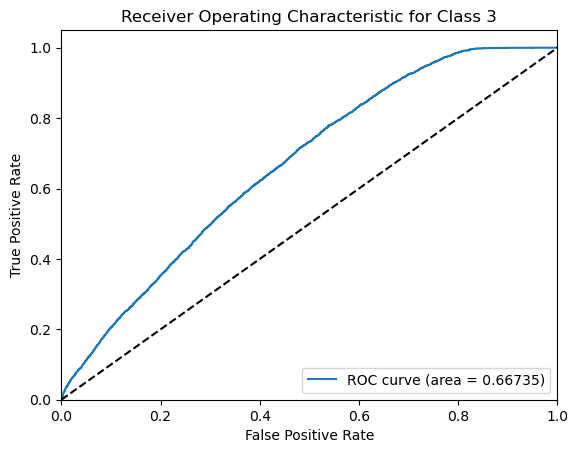

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

n_classes = 4

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_predict[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_predict[:, i], multi_class='ovr', average='macro')

# Plot ROC curve for each class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.5f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Class %d' % i)
    plt.legend(loc="lower right")
    plt.show()

In [34]:
model.save("gru_android_malwar_data.h5")